# **Statistics of car sales data**

## Loading the data

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [11]:
# load the data
df = pd.read_csv("/content/car_sales.csv")
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Identifying and removing missing values

In [12]:
# Find the missing values in each column
df.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [13]:
# Drop rows with missing values
df.dropna(inplace=True)
df

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520


In [14]:
#verifying that there is no null value now
df.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

## Identifying and dropping duplicates

In [15]:
#find duplicate values
df.duplicated().sum()

50

In [20]:
df.drop_duplicates(inplace=True)
df

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520


In [21]:
# verifying that there are no dupliactes left
df.duplicated().sum()

0

## Identifying variables in given dataset

In [22]:
# identify the variables in the given dataset
df.dtypes

Brand            object
Price           float64
Body             object
Mileage           int64
EngineV         float64
Engine Type      object
Registration     object
Year              int64
Model            object
dtype: object

## Making a bar graph for Brand name

In [24]:
# Group data by Brand name and count for each brand type
brand = df.groupby('Brand')['Brand'].count()
brand

Brand
Audi             419
BMW              631
Mercedes-Benz    802
Mitsubishi       306
Renault          443
Toyota           503
Volkswagen       871
Name: Brand, dtype: int64

In [25]:
# sort the values in descending order
brand = brand.sort_values(ascending=False)
brand

Brand
Volkswagen       871
Mercedes-Benz    802
BMW              631
Toyota           503
Renault          443
Audi             419
Mitsubishi       306
Name: Brand, dtype: int64

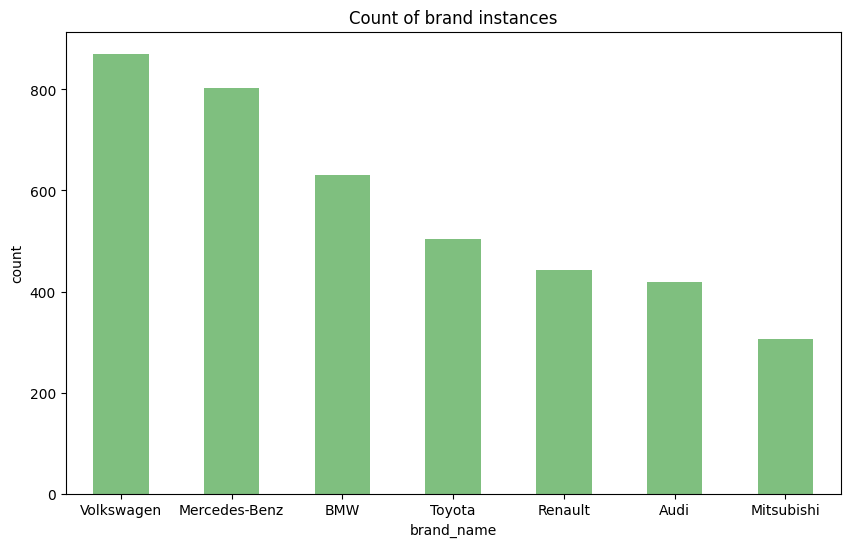

In [27]:
# plot the bar graph for the brands

plt.figure(figsize=(10,6))
brand.plot(kind = 'bar', color = 'green', alpha = 0.5)
plt.xlabel('brand_name')
plt.ylabel('count')
plt.title('Count of brand instances')
plt.show()

## Make pie chart for showing vehicle body types by percentage

In [30]:
# Group the data by body type and calculate the percentage of each body type

body_type_percentage = df.groupby('Body')['Body'].count()/len(df['Body'])*100
body_type_percentage = round(body_type_percentage, 2)
body_type_percentage

Body
crossover    20.25
hatch         6.74
other         9.84
sedan        38.19
vagon         9.46
van          15.52
Name: Body, dtype: float64

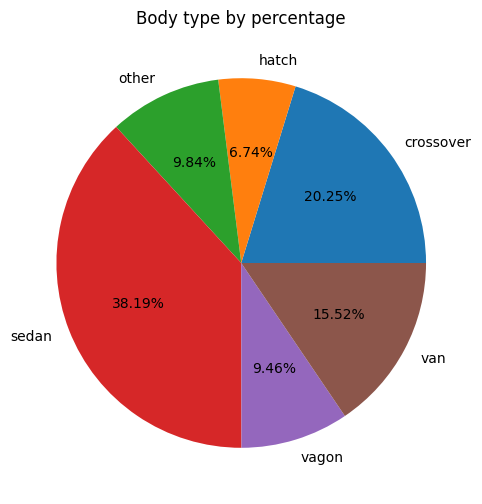

In [32]:
# Pie chart of body type by percentage
plt.figure(figsize=(6,6))
body_type_percentage.plot(kind = 'pie', autopct='%1.2f%%')
plt.title('Body type by percentage')
plt.ylabel('')
plt.show()

## Calculate average price of all cars by using correct measure of central tendency

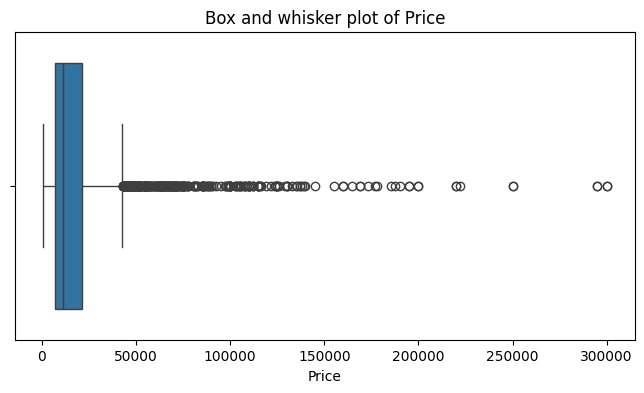

In [40]:
# Box plot of 'Price_in_thousands'

plt.figure(figsize=(8,4))
sns.boxplot(x=df['Price'])
plt.title('Box and whisker plot of Price')
plt.show()

As there are outliers in the data, Median would be the correct measure of central tendency for average price.

In [43]:
# Average price of all cars

average_price = df['Price'].median()
print('Average price of all cars:', int(average_price), 'dollars' )

Average price of all cars: 11400 dollars


Calculate the **variance and standard deviation** for numerical columns such as;

Price           float64

Mileage           int64

EngineV         float64

Year              int64


In [46]:
# Iterate over all columns and compute variance and standard deviation of numerical column
for c in df.columns:
  if(df[c].dtype == 'float64' or df[c].dtype == 'int64'):
    print(df[c].name)
    print("---------------------------------")
    print('Variance:\t\t', round(np.var(df[c]),2))
    print('Standard deviation:\t', round(np.std(df[c]), 2))
    print('\n\n')

Price
---------------------------------
Variance:		 623650718.09
Standard deviation:	 24973.0



Mileage
---------------------------------
Variance:		 10630.49
Standard deviation:	 103.1



EngineV
---------------------------------
Variance:		 24.65
Standard deviation:	 4.96



Year
---------------------------------
Variance:		 44.65
Standard deviation:	 6.68





## For the same columns, calculate IQR (interquartile range) and identify outliers in these columns

In [47]:
for c in df.columns:
  if(df[c].dtype == 'float64' or df[c].dtype == 'int64'):
    print(df[c].name)
    print("---------------------------------")

    Q1 = df[c].quantile(0.25)
    Q3 = df[c].quantile(0.75)
    IQR = Q3 - Q1
    print('IQR:\t\t', IQR, '\n')

    outliers = df[(df[c] < Q1 - 1.5 *IQR) | (df[c] > Q3 + 1.5 * IQR)][c]
    print('Outliers:\t', outliers)
    print('\n\n')

Price
---------------------------------
IQR:		 14367.5 

Outliers:	 5       199999.0
37       67500.0
41       63000.0
62      133000.0
64       50000.0
          ...   
4318    300000.0
4322    100000.0
4327     80999.0
4331     45000.0
4340    125000.0
Name: Price, Length: 348, dtype: float64



Mileage
---------------------------------
IQR:		 138.0 

Outliers:	 6       438
258     488
284     472
396     470
899     547
922     442
1198    520
1393    550
1410    500
1813    630
2043    462
2101    450
2155    500
2194    448
2290    525
2354    460
2469    450
2472    575
2488    523
2607    980
2873    504
2887    450
3086    440
3091    800
3214    505
3222    650
3281    470
3283    580
3457    650
3625    810
3631    535
3669    450
3741    460
3762    450
3799    457
4043    460
4045    480
4170    470
4313    440
4319    440
Name: Mileage, dtype: int64



EngineV
---------------------------------
IQR:		 1.2 

Outliers:	 2       5.0
5       5.5
41      5.5
48      5.0
53      

## Make Histograms for all numerical columns and identify the distribution of type by calculating skewness.

Note: If the skewness is 0, it indicates a perfectly symmetrical distribution.

If the skewness is negative, it means the distribution is skewed to the left (long left tail).

If the skewness is positive, it means the distribution is skewed to the right (long right tail).  

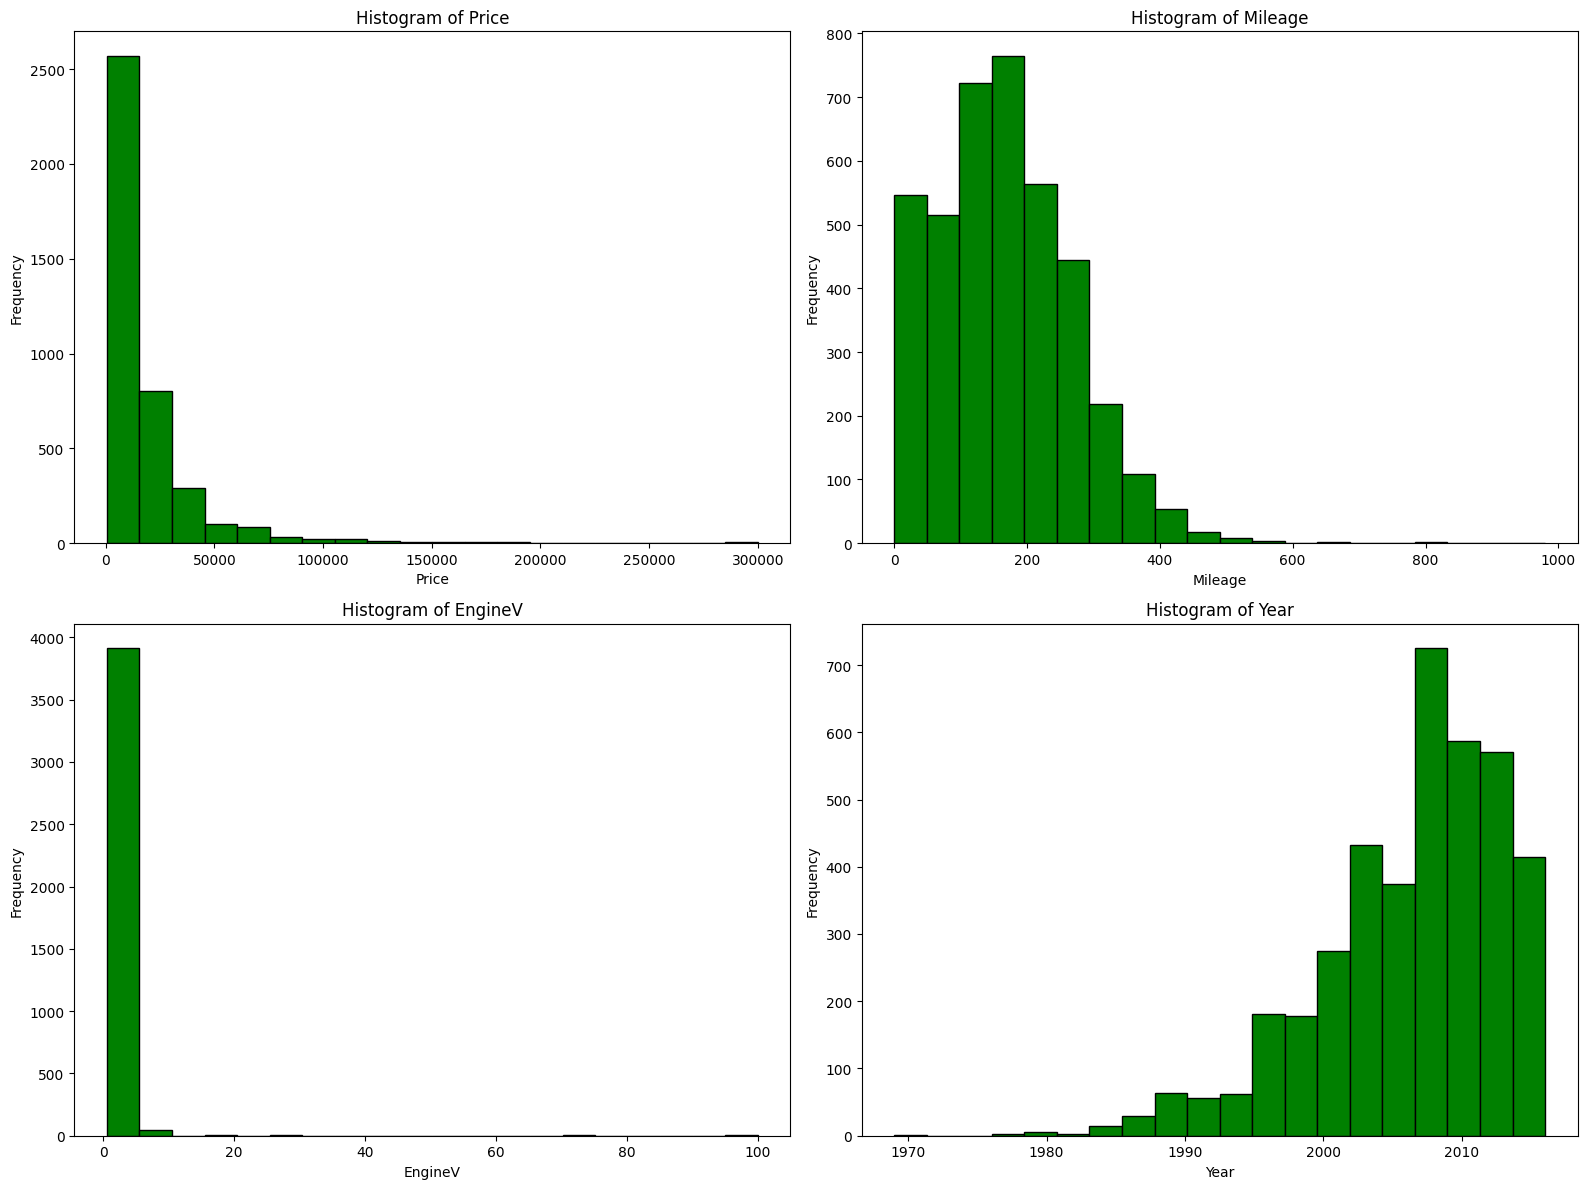

In [55]:
# Histograms of all numerical columns
# Select numeric columns only
numeric_columns = df.select_dtypes(include=['number'])

# Get the number of numeric columns
num_cols = len(numeric_columns.columns)

# Calculate the number of rows and columns for the subplots
num_rows = (num_cols // 2) + (num_cols % 2)  # Ensures that odd numbers have an extra row
num_cols_per_row = 2

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols_per_row, figsize=(16, 12))

# Flatten the 2D array of subplots into a 1D array
axes = axes.flatten()

# Plot data on each subplot
for i, column in enumerate(numeric_columns.columns):
    axes[i].hist(df[column], bins=20, color='green', edgecolor='black')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [56]:
# Calculate skewness for all numeric columns
for c in df.columns:
  if (df[c].dtype == 'float64' or df[c].dtype == 'int64'):
    print(df[c].name)
    print("---------------------------------")

    skewness = round(skew(df[c]),2)
    print('Skewness:', skewness)
    if(skewness == 0):
      print('Distribution is perfectly symmetrical')
    elif(skewness < 0):
      print('Distribution is skewed to the left')
    else:
      print('Distribution is skewed to the right')
    print('\n\n')

Price
---------------------------------
Skewness: 4.57
Distribution is skewed to the right



Mileage
---------------------------------
Skewness: 0.7
Distribution is skewed to the right



EngineV
---------------------------------
Skewness: 17.06
Distribution is skewed to the right



Year
---------------------------------
Skewness: -0.96
Distribution is skewed to the left





## **Key Insights**
**Price Distribution:** Car prices show significant variability with some extreme outliers.

**Brand Popularity:** Certain brands are more prevalent in the dataset, which may indicate market trends or the focus of the dataset.

**Body Type Distribution:** The majority of the cars fall into a few common body types.

**Mileage Distribution:** Most cars have relatively low mileage, with a few high-mileage outliers.

**Statistical Measures:** Variance and standard deviation provide insights into the spread and dispersion of the numerical features, while skewness analysis helps understand the data symmetry.
